### <i>Importing the libraries</i>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
## Read the file
d_train=pd.read_csv('train_insurance.csv')
d_test=pd.read_csv('test_insurance.csv')

In [3]:
d_train.shape,d_test.shape

((50882, 14), (21805, 13))

In [4]:
## Combine the data for analysis
df_final=pd.concat([d_train,d_test])

In [5]:
df_final.Region_Code.value_counts()

1       140
2       112
5       105
4       102
6       102
       ... 
5707      1
6063      1
6127      1
6189      1
5853      1
Name: Region_Code, Length: 5538, dtype: int64

In [6]:
df_final

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0.0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0.0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1.0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0.0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0,NaN
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0,NaN
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0,NaN
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0,NaN


In [7]:
## observation: ID,city_code,Region_code has more distinct values for the customers

In [8]:
df_final.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                   float64
dtype: object

In [9]:
df_final.describe(include='all')

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,72687.000000,72687,72687.000000,72687,72687,72687.000000,72687.000000,72687,55969,43833,43833.000000,72687.000000,72687.000000,50882.000000
unique,NaN,36,NaN,2,2,NaN,NaN,2,9,15,NaN,NaN,NaN,NaN
top,NaN,C1,NaN,Owned,Individual,NaN,NaN,No,X1,1.0,NaN,NaN,NaN,NaN
freq,NaN,12762,NaN,40041,57877,NaN,NaN,60687,18624,6390,NaN,NaN,NaN,NaN
mean,36344.000000,NaN,1737.573101,NaN,NaN,44.862713,42.741632,NaN,NaN,NaN,2.439486,15.122140,14194.856472,0.239947
std,20983.073845,NaN,1428.388402,NaN,NaN,17.293563,17.304194,NaN,NaN,NaN,1.029450,6.329295,6562.564815,0.427055
min,1.000000,NaN,1.000000,NaN,NaN,18.000000,16.000000,NaN,NaN,NaN,1.000000,1.000000,2152.000000,0.000000
25%,18172.500000,NaN,527.000000,NaN,NaN,28.000000,27.000000,NaN,NaN,NaN,1.000000,12.000000,9254.000000,0.000000
50%,36344.000000,NaN,1391.000000,NaN,NaN,44.000000,40.000000,NaN,NaN,NaN,3.000000,17.000000,13200.000000,0.000000
75%,54515.500000,NaN,2681.000000,NaN,NaN,59.000000,57.000000,NaN,NaN,NaN,3.000000,20.000000,18144.000000,0.000000


In [10]:
## Percentage of Missing values
missing_percent=(df_final.isnull().sum()/len(df_final))*100

In [11]:
missing_percent

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.999986
Holding_Policy_Duration    39.696232
Holding_Policy_Type        39.696232
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                   29.998487
dtype: float64

In [12]:
## observation: Three features has missing values around 40% of max 

In [13]:
## Lets perform some basic EDA
## Accommodation type

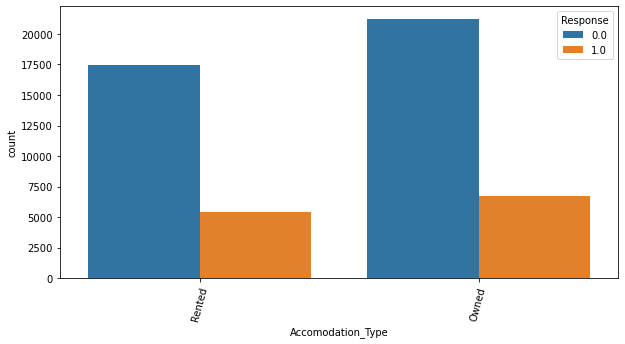

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(df_final.Accomodation_Type,hue=df_final.Response)
plt.xticks(rotation=75)
plt.show()

In [15]:
## observation: We can see the proportion of Response features is not balanced and people with owned and rented house are quite balanced
## 

In [16]:
print('Response: \n',df_final.Response.value_counts(),"\n-------------------")
print("Accomodation: \n",df_final.Accomodation_Type.value_counts())

Response: 
 0.0    38673
1.0    12209
Name: Response, dtype: int64 
-------------------
Accomodation: 
 Owned     40041
Rented    32646
Name: Accomodation_Type, dtype: int64


In [17]:
## Interms of Owned we have 6763 people who are willing for insurance
## and 5446 people who are rendted willing for applying insurance

Individual    57877
Joint         14810
Name: Reco_Insurance_Type, dtype: int64

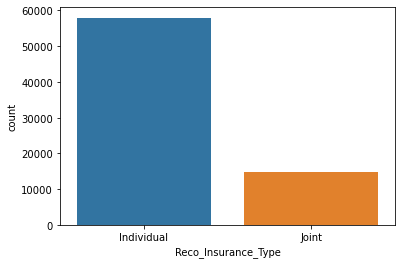

In [18]:
## Reco type
sns.countplot(df_final.Reco_Insurance_Type)
df_final.Reco_Insurance_Type.value_counts()

In [19]:
## The Individual insurance type has more propotion then Joint type.  

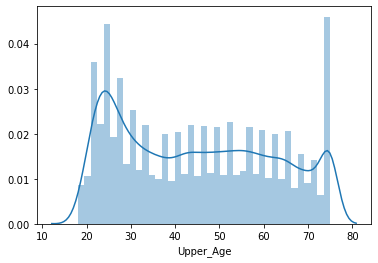

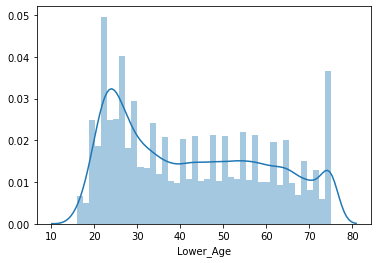

In [20]:
## Age
sns.distplot(df_final.Upper_Age)
plt.show()
sns.distplot(df_final.Lower_Age)
plt.show()

No     60687
Yes    12000
Name: Is_Spouse, dtype: int64

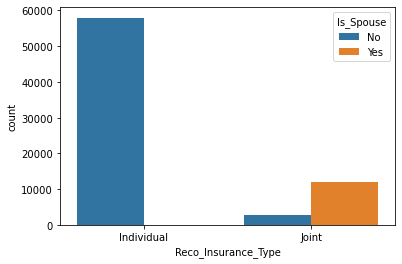

In [21]:
## Is_spouse
sns.countplot(df_final.Reco_Insurance_Type,hue=df_final.Is_Spouse)
df_final.Is_Spouse.value_counts()

In [22]:
dummy=df_final[df_final.Reco_Insurance_Type=='Individual']


In [23]:
dummy.Is_Spouse.value_counts()

No    57877
Name: Is_Spouse, dtype: int64

In [24]:
## As mentioned in the dictionary We dont have data for Individual type insurance customers

In [25]:
df_final.rename(columns={'Health Indicator':'Health_Indicator'},inplace=True)

In [26]:
df_final.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health_Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

1.0     6390
14+     6227
2.0     6032
3.0     5192
4.0     3976
5.0     3354
6.0     2797
7.0     2309
8.0     1885
9.0     1607
10.0    1146
11.0     800
13.0     732
12.0     709
14.0     677
Name: Holding_Policy_Duration, dtype: int64

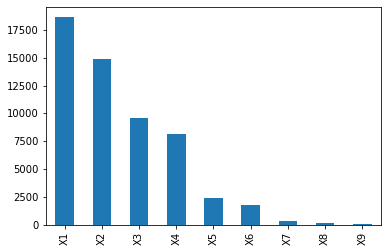

In [27]:
df_final.Health_Indicator.value_counts().plot(kind='bar')
df_final.Holding_Policy_Duration.value_counts()

In [28]:
##  last Three indicators have less frequency 

3.0    18851
1.0    11747
2.0     7155
4.0     6080
Name: Holding_Policy_Type, dtype: int64

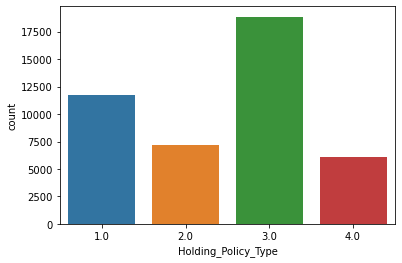

In [29]:
## Policy type

sns.countplot(df_final.Holding_Policy_Type)
df_final.Holding_Policy_Type.value_counts()

In [30]:
## Before proceeding with missing value imputation lets drop unwanted features and create a new feature and taking the 
## avg of upper and lower Age

In [31]:
df_final=df_final.drop(['ID','City_Code','Region_Code'],axis=1)

In [32]:
## The above features doesn't make any sense to dependent feature

In [33]:
## Lets convert 14+ to 15
df_final.loc[:,'Holding_Policy_Duration'].replace('14+','15',inplace=True)

In [34]:
df_final.Holding_Policy_Duration.value_counts()

1.0     6390
15      6227
2.0     6032
3.0     5192
4.0     3976
5.0     3354
6.0     2797
7.0     2309
8.0     1885
9.0     1607
10.0    1146
11.0     800
13.0     732
12.0     709
14.0     677
Name: Holding_Policy_Duration, dtype: int64

In [35]:
## lets perform missing value imputation
## All the three features has significant amount of missing value hence rather then using statistical measure we can proceed with 
## either alogorithm based imputation

In [36]:
df_final

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,Rented,Individual,36,36,No,X1,15,3.0,22,11628.0,0.0
1,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0.0
2,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1.0
3,Owned,Joint,52,48,No,X1,15,3.0,19,17780.0,0.0
4,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
21800,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0,NaN
21801,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0,NaN
21802,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0,NaN
21803,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0,NaN


In [37]:
acc_map={'Rented':1,'Owned':2}
Insurancetype_map={'Individual':1,'Joint':2}
Spouse_map={'No':1,'Yes':2}

In [38]:
df_final.Accomodation_Type=df_final.Accomodation_Type.map(acc_map)


In [39]:
df_final.Reco_Insurance_Type=df_final.Reco_Insurance_Type.map(Insurancetype_map)

In [40]:
df_final.Is_Spouse=df_final.Is_Spouse.map(Spouse_map)

In [41]:
## lets take avg age considering both upper and lower age 

In [42]:
df_final['Avg_age']=(df_final['Upper_Age'] + df_final['Lower_Age'] )/2

### dropping both age columns since we have created a new feature by taking avg

In [43]:
df_final=df_final.drop(['Upper_Age','Lower_Age'],axis=1)

In [44]:
df_final.Reco_Policy_Premium.value_counts()

10800.0    92
10368.0    88
10080.0    85
12060.0    82
11880.0    82
           ..
17217.2     1
32496.0     1
3348.0      1
5902.4      1
10275.0     1
Name: Reco_Policy_Premium, Length: 7685, dtype: int64

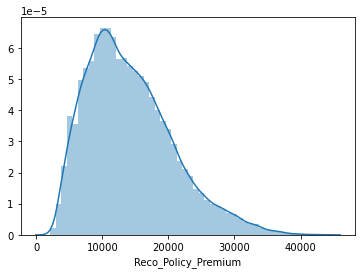

In [45]:
sns.distplot(df_final.Reco_Policy_Premium)

In [46]:
df_final.Avg_age.value_counts()

75.0    3143
24.0    2316
23.0    2310
25.0    2272
22.0    2160
        ... 
21.5      60
20.5      41
19.5      15
18.5       5
17.5       1
Name: Avg_age, Length: 116, dtype: int64

In [47]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72687 entries, 0 to 21804
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Accomodation_Type        72687 non-null  int64  
 1   Reco_Insurance_Type      72687 non-null  int64  
 2   Is_Spouse                72687 non-null  int64  
 3   Health_Indicator         55969 non-null  object 
 4   Holding_Policy_Duration  43833 non-null  object 
 5   Holding_Policy_Type      43833 non-null  float64
 6   Reco_Policy_Cat          72687 non-null  int64  
 7   Reco_Policy_Premium      72687 non-null  float64
 8   Response                 50882 non-null  float64
 9   Avg_age                  72687 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 8.1+ MB


In [48]:
df_final.Avg_age=df_final.Avg_age.astype(int)
df_final.Reco_Policy_Premium=df_final.Reco_Policy_Premium.astype(int)

In [49]:
df_final.Reco_Policy_Premium.value_counts()

10800    92
10368    88
10080    85
11880    82
12060    82
         ..
5864      1
33180     1
4494      1
10505     1
20246     1
Name: Reco_Policy_Premium, Length: 7436, dtype: int64

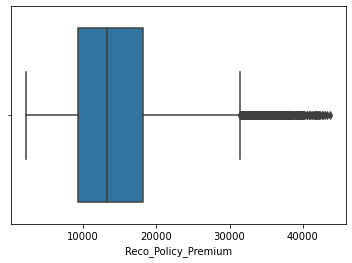

In [50]:
sns.boxplot(df_final.Reco_Policy_Premium)

In [51]:
# Reco_Policy_Premium Feature
df_final['Reco_Policy_Premium'] = df_final['Reco_Policy_Premium'].astype(int)
df_final.loc[ df_final['Reco_Policy_Premium'] <= 10000, 'Reco_Policy_Premium'] = 0
df_final.loc[(df_final['Reco_Policy_Premium'] > 10000) & (df_final['Reco_Policy_Premium'] <= 15000), 'Reco_Policy_Premium'] = 1
df_final.loc[(df_final['Reco_Policy_Premium'] > 15000) & (df_final['Reco_Policy_Premium'] <= 20000), 'Reco_Policy_Premium'] = 2
df_final.loc[ df_final['Reco_Policy_Premium'] > 20000, 'Reco_Policy_Premium'] = 3

In [52]:
# Avg_age Feature
df_final['Avg_age'] = df_final['Avg_age'].astype(int)
df_final.loc[ df_final['Avg_age'] <= 18, 'Avg_age'] = 0
df_final.loc[(df_final['Avg_age'] > 18) & (df_final['Avg_age'] <= 28), 'Avg_age'] = 1
df_final.loc[(df_final['Avg_age'] > 28) & (df_final['Avg_age'] <= 42), 'Avg_age'] = 2
df_final.loc[(df_final['Avg_age'] > 42) & (df_final['Avg_age'] <= 58), 'Avg_age'] = 3
df_final.loc[ df_final['Avg_age'] > 58, 'Avg_age'] = 4

### Function for Encoding the features contaning missing values

In [53]:
encoder=LabelEncoder()
def encode_data(data):
    ## retains only notnull values
    nonulls=np.array(data.dropna())
    impute_org=encoder.fit_transform(nonulls)
    ## assign back encoded values to non-null values
    data.loc[data.notnull()]=np.squeeze(impute_org)
    return data

In [54]:
df_final['Health_Indicator']=encode_data(df_final['Health_Indicator'])

In [55]:
df_final.isnull().sum()

Accomodation_Type              0
Reco_Insurance_Type            0
Is_Spouse                      0
Health_Indicator           16718
Holding_Policy_Duration    28854
Holding_Policy_Type        28854
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                   21805
Avg_age                        0
dtype: int64

### Custom function for missing value imputation

In [56]:

def impute_columns(data):
    ## filtering x train data by removing null values
    x1=df_final[data.notna()]
    x=x1.drop(['Health_Indicator','Holding_Policy_Duration','Holding_Policy_Type','Response'],axis=1)
    ## retains only notnull values for each column
    nonulls=data.loc[data.notna()]
    y=pd.to_numeric(nonulls).astype(int)
    print(y)
    ## filterinf xtest data
    xtest=df_final[data.isnull()]
    x_testfinal=xtest.drop(['Health_Indicator','Holding_Policy_Duration','Holding_Policy_Type','Response'],axis=1)
    randomforest = RandomForestClassifier(n_estimators=100)
    randomforest.fit(x,y)
    y_pred=randomforest.predict(x_testfinal)
    return y_pred

In [57]:

columns=['Health_Indicator','Holding_Policy_Duration','Holding_Policy_Type']
for col in columns:
    df_final[col].loc[df_final[col].isnull()]=np.squeeze(impute_columns(df_final[col]))

0        0
1        1
3        0
4        1
5        1
        ..
21800    0
21801    4
21802    2
21803    3
21804    1
Name: Health_Indicator, Length: 55969, dtype: int32
0        15
2         1
3        15
4         3
5         5
         ..
21799     6
21800     4
21801     6
21803     3
21804    15
Name: Holding_Policy_Duration, Length: 43833, dtype: int32
0        3
2        1
3        3
4        1
5        1
        ..
21799    3
21800    1
21801    3
21803    1
21804    2
Name: Holding_Policy_Type, Length: 43833, dtype: int32


In [58]:
df_final.Health_Indicator=pd.to_numeric(df_final.Health_Indicator).astype(int)
df_final.Holding_Policy_Duration=pd.to_numeric(df_final.Holding_Policy_Duration).astype(int)
df_final.Holding_Policy_Type=pd.to_numeric(df_final.Holding_Policy_Type).astype(int)

In [59]:
df_final=df_final.drop(['Is_Spouse'],axis=1)

In [60]:
df_final

,Accomodation_Type,Reco_Insurance_Type,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Avg_age
0,1,1,0,15,3,22,1,0.0,2
1,2,2,1,15,3,22,3,0.0,3
2,2,1,0,1,1,19,0,1.0,2
3,2,2,0,15,3,19,2,0.0,3
4,1,1,1,3,1,16,1,0.0,3
...,...,...,...,...,...,...,...,...,...
21800,2,1,0,4,1,18,2,NaN,3
21801,2,1,4,6,3,18,3,NaN,4
21802,2,1,2,15,3,1,2,NaN,4
21803,1,1,3,3,1,19,1,NaN,1


### Split the train and test file

In [61]:
df_train=df_final.iloc[:50882,:]
df_test=df_final.iloc[50882:72687,:]

In [62]:
df_train.shape,df_test.shape

((50882, 9), (21805, 9))

In [63]:
X=df_train.drop(['Response'],axis=1)
Y=df_train['Response']

In [64]:
## Feature Importance
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [65]:
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,Y)

In [66]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
##featureScores.sort_values(by='Score',ascending=False)

In [67]:
featureScores

,Specs,Score
0,Accomodation_Type,0.219939
1,Reco_Insurance_Type,0.670150
2,Health_Indicator,0.292081
3,Holding_Policy_Duration,51.696020
4,Holding_Policy_Type,1.036803
5,Reco_Policy_Cat,1768.726386
6,Reco_Policy_Premium,1.770676
7,Avg_age,0.013926


In [68]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

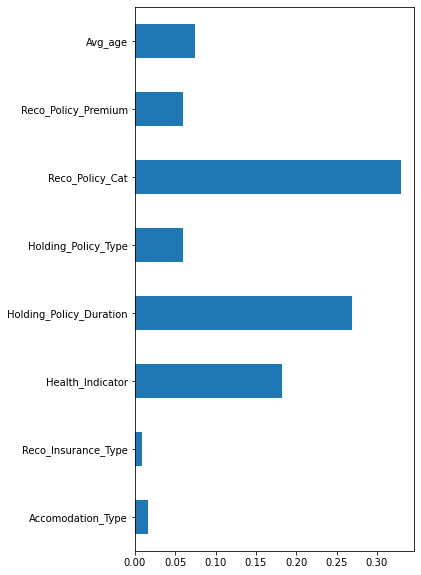

In [69]:
plt.figure(figsize=(5,10))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

### Oversampling to handle class imbalance

In [70]:
##from imblearn.over_sampling import SMOTE
##from imblearn.over_sampling import RandomOverSampler

In [71]:
##smote=SMOTE() 
##random=RandomOverSampler()
##x_res,y_res=random.fit_sample(X_dummy,Y_dummy)

In [72]:
##from collections import Counter
##print("before",Counter(Y))
##print("after",Counter(y_res))

### Lets standartize the data for few algorithms

In [73]:
Scale=StandardScaler()
x_new=Scale.fit_transform(X)

### let us split the train data

In [74]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
x_train1,x_test1,y_train1,y_test1=train_test_split(x_new,Y,test_size=0.3,random_state=0)

### logistic regression

In [75]:
logreg=LogisticRegression()
logreg.fit(x_train1,y_train1)
y_pred = logreg.predict(x_test1)
y_pred
fpr1,tpr1,threshold1= roc_curve(y_test1, logreg.predict_proba(x_test1)[:,1])
score1=roc_auc_score(y_test1,logreg.predict_proba(x_test1)[:,1] )

### Random forest

In [76]:
randomforest = RandomForestClassifier(n_estimators=100,criterion='entropy')
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
score2=roc_auc_score(y_test,randomforest.predict_proba(x_test)[:,1] )
fpr2, tpr2, thresholds2 = roc_curve(y_test, randomforest.predict_proba(x_test)[:,1])

### XGBOOST

In [104]:
from xgboost import XGBClassifier
xboost = XGBClassifier(gamma=10)
xboost.fit(x_train, y_train)
score6=roc_auc_score(y_test,xboost.predict_proba(x_test)[:,1] )
fpr6, tpr6, thresholds6 = roc_curve(y_test, xboost.predict_proba(x_test)[:,1])


[23:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### KNN

In [100]:
 ##KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train1, y_train1)
y_pred = knn.predict(x_test1)
score3=roc_auc_score(y_test1,knn.predict_proba(x_test1)[:,1] )
fpr3, tpr3, thresholds3 = roc_curve(y_test1, knn.predict_proba(x_test1)[:,1])

### NaiveB

In [101]:
# classical Naive Bayes
from sklearn.naive_bayes import CategoricalNB
classical = CategoricalNB()
classical.fit(x_train, y_train)
y_pred = classical.predict(x_test)
score5=roc_auc_score(y_test,classical.predict_proba(x_test)[:,1] )
fpr5, tpr5, thresholds5 = roc_curve(y_test, classical.predict_proba(x_test)[:,1])

In [105]:
final_score=pd.DataFrame({'Model': ['logreg','Randomforest','knn','NaiveB','XGboost'],
                         'auc_score':[score1,score2,score3,score5,score6]})
final_score.sort_values(by='auc_score',ascending=False)

,Model,auc_score
4,XGboost,0.641150
3,NaiveB,0.616293
1,Randomforest,0.584077
0,logreg,0.562442
2,knn,0.553850


### Plotting the AUC-ROC graph

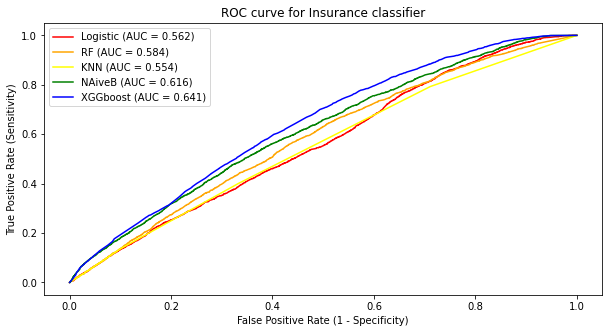

In [106]:
plt.figure(figsize=(10,5))
plt.title('ROC curve for Insurance classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr1, tpr1,color='red',label='Logistic (AUC = %0.3f)'% score1)
plt.plot(fpr2, tpr2,color='orange',label='RF (AUC = %0.3f)'% score2)
plt.plot(fpr3, tpr3,color='yellow',label='KNN (AUC = %0.3f)'% score3)
plt.plot(fpr5, tpr5,color='green',label='NAiveB (AUC = %0.3f)'% score5)
plt.plot(fpr6, tpr6,color='blue',label='XGGboost (AUC = %0.3f)'% score6)
plt.legend()
plt.show()

In [107]:
### Lets predict for the Test data
df_test=df_test.drop(['Response'],axis=1)

In [108]:
y_finalpred=randomforest.predict_proba(df_test)[:,1]

In [109]:
id_add=d_test['ID']

In [110]:
submission=pd.DataFrame({'ID':id_add,'Response':y_finalpred})

In [111]:
submission.to_csv(r"C:\Users\venkatesh\hackathon\submission.csv",index="false")

In [ ]:
## We have more no of customer which has own house comapring to those who are rented
## 